In [59]:
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
#Загружаем эти данные в датафрейм, и подбираем кодировку
df = pd.read_csv('sb.csv', encoding='cp1251')
df.head(10)

,name,region,date,value
0,Количество заявок на потребительские кредиты,Россия,2013-01-15,571147
1,Количество заявок на потребительские кредиты,Россия,2013-02-15,504508
2,Количество заявок на потребительские кредиты,Россия,2013-03-15,628803
3,Количество заявок на потребительские кредиты,Россия,2013-04-15,836054
4,Количество заявок на потребительские кредиты,Россия,2013-05-15,867235
5,Количество заявок на потребительские кредиты,Россия,2013-06-15,768036
6,Количество заявок на потребительские кредиты,Россия,2013-07-15,912096
7,Количество заявок на потребительские кредиты,Россия,2013-08-15,911461
8,Количество заявок на потребительские кредиты,Россия,2013-09-15,856974
9,Количество заявок на потребительские кредиты,Россия,2013-10-15,977855


In [61]:
#Выводим в интерфейс значения по разрезам учета
res = df["name"].unique()
reg = df["region"].unique()
print(res)
print(reg)

['Количество заявок на потребительские кредиты'
 'Средняя сумма заявки на потребительский кредит'
 'Количество заявок на ипотечные кредиты'
 'Средняя сумма заявки на ипотечный кредит' 'Количество новых депозитов'
 'Средняя сумма нового депозита' 'Средняя зарплата' 'Средняя пенсия'
 'В среднем руб. на текущем счете на человека'
 'В среднем депозитов в руб. на человека' 'Средние расходы по картам'
 'Средний чек в формате Фастфуд' 'Средний чек в формате Ресторан'
 'Средние траты в ресторане фастфуд' 'Средние траты в ресторане']
['Россия' 'Алтайский край' 'Амурская область' 'Архангельская область'
 'Астраханская область' 'Белгородская область' 'Брянская область'
 'Владимирская область' 'Волгоградская область' 'Вологодская область'
 'Воронежская область' 'Еврейская автономная область' 'Забайкальский край'
 'Ивановская область' 'Иркутская область'
 'Кабардино-Балкарская Республика' 'Калининградская область'
 'Калужская область' 'Камчатский край' 'Кемеровская область'
 'Кировская область' 'Ко

In [62]:
#Функция получения фильтрованного датафрейма
def get_new_df(**arg):
    global df
    ret = df
    for k,v in arg.items():
        if 'datemin' in k:
            k = k.replace('min','')
            ret = ret[ret[k]>=v]
        elif 'datemax' in k:
            k = k.replace('max','')
            ret = ret[ret[k]<=v]
        else:    
            ret = ret[ret[k]==v]
    return ret

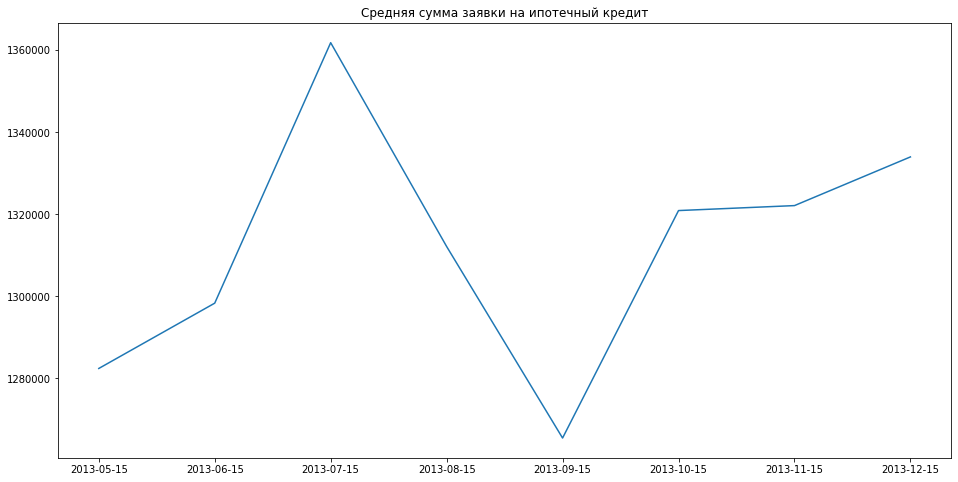

In [73]:
#Выводим график
new_df = get_new_df(name='Средняя сумма заявки на ипотечный кредит', 
           region = 'Ростовская область',
          datemin = '2013-05-15',
          datemax = '2013-12-20')

X = new_df['date']
y = new_df['value']

plt.figure(figsize = (16, 8))
plt.title(new_df['name'].iloc[0])
plt.plot(X,y)
plt.show()